# <font color="light blue">Analysis of Spotify Songs
Contributers: <br>
-Ege Metin <br>
-Gizem Fıçıcıoğlu <br>
-Ali Berzan Koçdağ <br>
-Onur Mert Gürses <br>
-Mert Ali Çelik <br>
<font>

## **Introduction**</font> 

In our Spotify Project we took the data from the website of Kaggle. In the first part, all the statistics like loudness, danceability, tempo, duration can be found. We used scatterplots, histograms and subplots for visualiazation techniques of the data. Then, we looked at the correlation between all the features in a detailed way. After that, we analyzed the most viewed popular songs and artists. After that, we compared the features of genres, and we analyzed the features of sub-genres of some music genres like pop, rock and hip-hop.
</font>


---



## Exploratory Data Analysis

<font color="white">
Our group size is 5, so: We are doing these tasks
</font>

```
- Visualizations Descriptive Statistics 
- Visualizations of Aggregated Forms Based on Features
- Analysis of the Most Popular Artists and Songs
- How Songs of Different Genres Change Over Time
- Comparison of features of sub-genres for selected parent genres over time periods
```


---



In [ ]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive/CS 210 Project/Spotify Files'

Mounted at ./drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from os.path import join
from os import listdir
import plotly.express as px
import math 
import re

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline



### Visualizations Descriptive Statistics 


All characteristics with their statistics




In [ ]:
df = pd.read_csv(join(path_prefix, "data_by_year.csv")) # data_by_year file'daki tum istatistikler gorulebilir
df_popularity = pd.read_csv(join(path_prefix, "data.csv"))
df.describe()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,1970.500000,0.548818,0.536939,228698.383547,0.455189,0.214148,0.212475,-12.192694,0.116602,116.096664,0.530724,22.949745,3.794118,1.0
std,29.588849,0.271056,0.049568,28440.517398,0.164968,0.109135,0.016892,3.048535,0.107207,5.944764,0.058941,16.780564,3.518940,0.0
min,1920.000000,0.189632,0.415141,140135.140496,0.208856,0.099986,0.162309,-20.840083,0.051205,100.033149,0.378276,0.090909,0.000000,1.0
25%,1945.250000,0.298426,0.501910,211933.800750,0.280230,0.124572,0.200305,-14.298878,0.064468,111.042118,0.492407,3.315919,0.000000,1.0
50%,1970.500000,0.458340,0.541315,238300.393513,0.494563,0.182022,0.212563,-11.849556,0.084892,117.813859,0.541784,29.160167,2.000000,1.0
75%,1995.750000,0.843186,0.573307,249445.435116,0.595108,0.283295,0.222198,-9.756256,0.101711,120.635131,0.570131,36.105230,7.000000,1.0
max,2021.000000,0.962702,0.655929,284759.933638,0.694245,0.581701,0.262480,-7.376558,0.627131,125.203277,0.669676,50.873598,10.000000,1.0


A function which helps us to plot two feaature's correlation

In [ ]:
def plot_corr(feature_1,feature_2,title): 
    main_df = df_popularity
    corr_df = main_df[[feature_1,feature_2]]
    corr_df["feature_1_interval"] = pd.cut(main_df[feature_1],np.arange(0,1,0.0001),labels=[f"{feature_1}_{i}" for i in range(1,10000)])
    corr_df = corr_df.groupby("feature_1_interval").median()
    plot = px.scatter(corr_df,x=feature_1, y=feature_2,)
    plot.update_traces(marker=dict(size=5,color='rgba(30, 215, 96, .9)',line=dict(width=1)),selector=dict(mode='markers'))
    plot.update_layout(title_text=title)

    plot.show()



---


### Visualizations of Aggregated Forms Based on Features

In [ ]:
plot_corr("energy","popularity","Energy vs Popularity") 

As we can see, mostly the popular songs are founded in the 0.5-0.9 energy level. However, there are unique songs which can be founded in the energy area 0-0.1.

In [ ]:
plot_corr("liveness","popularity","Liveness vs Popularity")

In the Liveness vs Popularity chart, we see that there is a balanced situation between the liveness and popularity. Mostly the popularity not based on the liveness. However, there are some unique parts that we see the correlation between liveness and popularity. For instance, there is a pile of the 0-0.1 area on the graph.

In [ ]:
plot_corr("acousticness","popularity","Acousticness vs Popularity") 

In this graph, we saw that acousticness dramatically kills the popularity. Mostly, when the songs have more acoustic characteristic, it gets more unpopular.





---


With the help of these 3 histograms, we can see that in all the songs:


*   The tempo is mostly between 75-150.
*   The danceability is mostly between 0.5-0.7
*   Artists created/distributed new songs mostly after 1950s






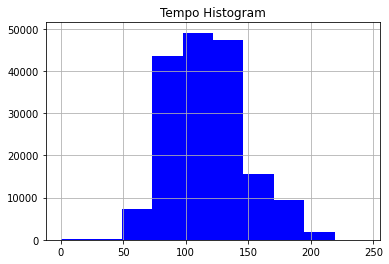

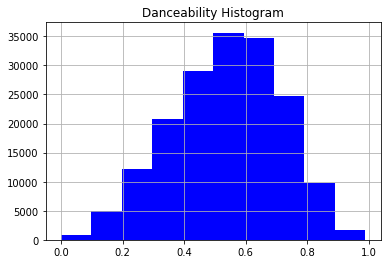

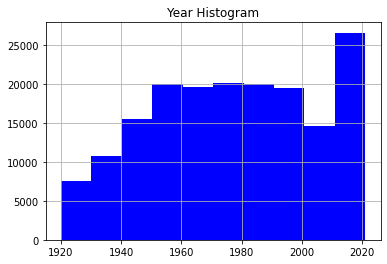

In [ ]:
cols = {'year', 'tempo', 'danceability'}

for column in cols:
  plot = df_popularity[column].hist(color = "blue")
  plt.title(column.capitalize() + " Histogram")
  plt.show()
  print()




---


With the scatterplot of energy values, we can see that (mostly) energy levels increased between the time period 1992-2021.

<function matplotlib.pyplot.show>

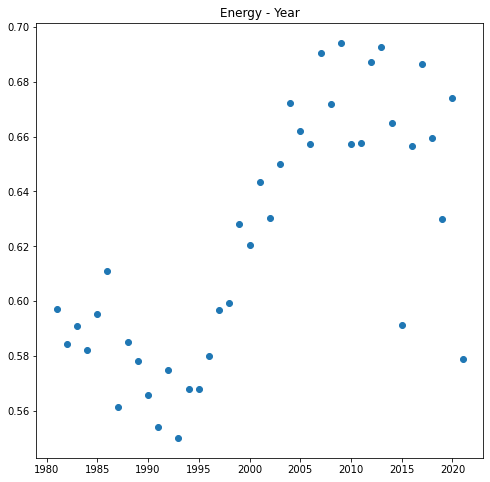

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(year_series, energy_series)
plt.title("Energy - Year")
plt.minorticks_on
plt.show




---


This small piece of code helps us to analyze the correlation between all characteristics. For instance, we can say that energy and loudness are well correlated.

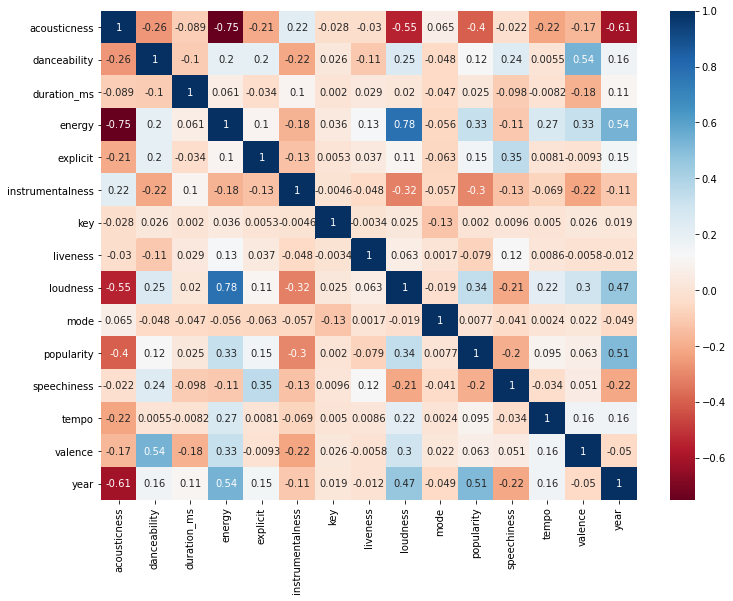

In [ ]:
from matplotlib import cm 
plt.figure(figsize=(12, 9))
corr = df_popularity.corr() # or df 
heat=sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap=cm.RdBu,annot=True)

plt.show()



---


### Analysis of the Most Popular Artists and Songs

We see the 10 most popular songs and the artists. Olivia Rodrigo - Drivers Licence is the most popular song with tempo 143, energy 0.436 etc.

In [ ]:
df_popularity = pd.read_csv(join(path_prefix, "data.csv"))
nan_value = float("NaN")
df_popularity.replace('[]', nan_value, inplace=True)
df_popularity.dropna(subset = ['artists'], inplace = True)

df_popularity = df_popularity.sort_values('popularity', ascending = False, inplace = False) 

df_popularity.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
20062,0.7210,['Olivia Rodrigo'],0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,-8.761,1,drivers license,100,2021-01-08,0.0601,143.874,0.132,2021
19862,0.2210,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.756,2020
19866,0.4680,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.682,2020
19886,0.4010,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,2020-10-30,0.0544,109.928,0.145,2020
19976,0.2120,['KAROL G'],0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,2020-10-23,0.1520,163.908,0.838,2020
19868,0.2370,['Ariana Grande'],0.830,173711,0.585,1,6Im9k8u9iIzKMrmV7BWtlF,0.000000,0,0.2480,-6.476,1,34+35,94,2020-10-30,0.0940,109.978,0.485,2020
19870,0.1900,['CJ'],0.711,123429,0.598,1,5vGLcdRuSbUhD8ScwsGSdA,0.000000,3,0.1500,-7.621,0,Whoopty,94,2020-08-20,0.1820,140.175,0.737,2020
19872,0.2130,['The Kid LAROI'],0.662,161385,0.413,1,27OeeYzk6klgBh83TSvGMA,0.000000,0,0.1340,-7.357,1,WITHOUT YOU,94,2020-11-06,0.0299,93.005,0.467,2020
19876,0.2180,['Billie Eilish'],0.889,174321,0.340,0,54bFM56PmE4YLRnqpW6Tha,0.130000,11,0.0550,-7.773,0,Therefore I Am,94,2020-11-12,0.0697,94.009,0.716,2020
19928,0.0303,"['Bad Bunny', 'ROSALÍA']",0.856,203201,0.618,0,2XIc1pqjXV3Cr2BQUGNBck,0.000000,7,0.0866,-4.892,1,LA NOCHE DE ANOCHE,94,2020-11-27,0.2860,81.993,0.391,2020


We see the most popular artist and songs by each year. For instance, in 1958 Elvis Presley was the most popular artist with his "Blue Chrismas".

In [ ]:
years = df_popularity.year.unique()
top_artists_each_year = [df_popularity.query('year==@year').sort_values("popularity",ascending=False).iloc[0] for year in years]
top_artists_each_year_df = pd.DataFrame(top_artists_each_year)
top_artists_each_year_df['artists'] = top_artists_each_year_df['artists'].apply(lambda x:x.replace("[","").replace("]","").replace("'",""))
top_artists_each_year_df['name'] = [df_popularity[df_popularity.artists.str.contains(artists.split(",")[0])]["name"].iloc[0].replace("[","").replace("]","") for artists in top_artists_each_year_df["artists"].values]

fig = px.scatter(top_artists_each_year_df, x="year", y="popularity",hover_data=['artists','name'])
fig.update_traces(mode='markers', marker_line_width=2,marker=dict(size=10,color='rgba(255, 99, 71, .9)'))
fig.update_layout(title="Most Popular Artists and Songs Each Year")
fig.show()

In this graph, we see the most popular artists and their popularity level (Different from the first one because this graph has total popularity level according to their songs, not only based on one song). Ariana Grande a

In [ ]:
fig = px.bar(df_popularity.head(30),x="popularity",y="artists",labels={"artists": "Artists","count": "Number of Tracks"},orientation='h',hover_data=['name'])
fig.update_layout(height=600, width=2300, title_text="Most Popular Artists and their Popularity",yaxis={'categoryorder':'total ascending'})

fig.show()



---


### How Songs of Different Genres Change Over Time

In [ ]:

genre_df = pd.read_csv(join(path_prefix, "data_by_genres.csv"))

nan_value = float("NaN")
genre_df.replace('[]', nan_value, inplace=True)
genre_df.dropna(subset = ['genres'], inplace = True)

In [ ]:
genres_list = ["rock" , "jazz" , "pop" , "metal" , "classical", "hip hop"]

In [ ]:
data_main = pd.read_csv(join(path_prefix,"data.csv"))
genre = pd.read_csv(join(path_prefix,"data_w_genres.csv"))

data_main['artists'] = data_main['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
data_main = data_main.explode('artists')
merged_version = pd.merge(data_main, genre, on="artists")
merged_version['genres'] = merged_version['genres'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
merged_version=merged_version.explode('genres')

In [ ]:
new_version=merged_version.drop(['acousticness_x','valence_x','danceability_x','duration_ms_x','energy_x',
                                 'explicit','id','instrumentalness_x' ,'key_x','liveness_x', 'loudness_x', 'mode_x', 
                                 'popularity_x', 'speechiness_x', 'tempo_x','valence_x','key_y',
                                 'mode_y','count'],axis=1)
#'artists''release_date''name'

In [ ]:
nan_value = float("NaN")
new_version.replace('[]', nan_value, inplace=True)
new_version.dropna(subset = ['genres'], inplace = True)

In [ ]:
new_version= new_version.sort_values(by ='year' )
new_version.dropna(axis=0, how='any')
new_version.drop_duplicates( keep='first', inplace=True)

In [ ]:
only_pop = new_version.loc[new_version['genres'].str.contains("pop", case=False)]
only_rock = new_version.loc[new_version['genres'].str.contains("rock", case=False)]

In [ ]:
df_pop=only_pop.drop(['genres'],axis=1)
pop_based_year=df_pop.groupby("year").mean()

df_rock=only_rock.drop(['genres'],axis=1)
rock_based_year=df_rock.groupby("year").mean()

In [ ]:

from collections import Counter

genre_names_text = " ".join(genre_df['genres'].tolist()).split(" ")
column_names = ["word","count"]
most_common_words_in_genres_df = pd.DataFrame([dict(zip(column_names,word_count)) for word_count in Counter(genre_names_text).most_common(15)])

fig = px.bar(most_common_words_in_genres_df.sort_values("count"),x="count",y="word",labels={"word": "Word in Genres","count": "Word Frequency"},orientation='h')
fig.update_layout(height=600, width=1100, title_text="Most Common Words in Genres (Frequency)")

fig.show()

In [ ]:
fig = px.line(pop_based_year, x = pop_based_year.index, y = 'energy_y', title='Energy vs Year (Pop)',width=600,height=500)
fig.show()

fig = px.line(pop_based_year, x = pop_based_year.index, y = 'instrumentalness_y', title='Instrumentalness vs Year (Pop)',width=600,height=500)
fig.show()

fig = px.line(rock_based_year, x = rock_based_year.index, y = 'energy_y', title='Energy vs Year (Rock)',width=600,height=500)
fig.show()

fig = px.line(rock_based_year, x = rock_based_year.index, y = 'instrumentalness_y', title='Instrumentalness vs Year (Rock)',width=600,height=500)
fig.show()



---


### Comparison of features of sub-genres for selected parent genres over time periods

Now, you are going to see 2 examples of subgenres and their features' relations

In [ ]:
only_swedishMetal = new_version.loc[new_version['genres'].str.contains("swedish progressive metal", case=False)]

df_pop=only_pop.drop(['genres'],axis=1)
swedishMetal_based_year=df_pop.groupby("year").mean()


fig = px.line(swedishMetal_based_year, x = swedishMetal_based_year.index, y = 'acousticness_y', title='Acousticness - Year (Swedish Progressive Metal)',width=500,height=350)
fig.show()

fig = px.line(swedishMetal_based_year, x = swedishMetal_based_year.index, y = 'instrumentalness_y', title='Instrumentalness - Year',width=500,height=350)
fig.show()

We can infer that acousticness and intrumentalness' relation over years for Sweedish Progressive Metal are almost the same from the graphs

In [ ]:
only_greekHipHop = new_version.loc[new_version['genres'].str.contains("greek hip hop", case=False)]

df_pop=only_pop.drop(['genres'],axis=1)
only_greekHipHop=df_pop.groupby("year").mean()


fig = px.line(only_greekHipHop, x = only_greekHipHop.index, y = 'acousticness_y', title='Acousticness - Year (Greek Hip Hop)',width=500,height=350)
fig.show()

fig = px.line(only_greekHipHop, x = only_greekHipHop.index, y = 'instrumentalness_y', title='Instrumentalness - Year',width=500,height=350)
fig.show()

We can infer that acousticness and intrumentalness' relation over years for Greek Hip Hop are almost the same from the graphs

And the next one is an additional load of graphs which shows the mosts of 6 features of each sub-genres



---




## Statistical Analysis & Hypothesis Testing

<font color="white">

</font>

---
<font color="red">Tasks</font>
1.   Statistical tests to check how (or if) features contribute to popularity of songs.
2.   Statistical tests to check if significant differences exist between different eras (like comparing features of 80s and 90s hip-hop)
3.   Statistical tests on sub-genres (investigating if there are significant statistical differences in features of different sub-genres of the same parent genre, eg. comparing features of british rock and anadolu rock songs)


---



*   In this step, we are trying to use some statistical methods (we used P-test, p values) to prove or disprove the null hyphothesis. Some terminology that we used:
*  **Null Hypothesis ($H_0$)** : There is not any significant differences in terms of popularity for different song features.
*  **Alternative Hypothesis ($H_A$)**: There is significant differences in terms of popularity for different song features.
* **Significance Level**: We assumed 0.05 as significance level. Because, as most of hypothesis test assume the significance level as 0.05.

*Blue area represents the most 20 popular songs' statistics and yellow area represents other songs. We decided to take most popular songs because we want to analyze the correlation between popularity and features.


---






### Statistical tests to check how (or if) features contribute to popularity of songs

#### Hypothesis -> 1
<font color='sky blue'> **Null Hypothesis: ** 

Danceability has no effect on the popularity of the songs.

<font color='sky blue'>**Alternative Hypothesis: **

Danceability has an effect on the popularity of the songs.

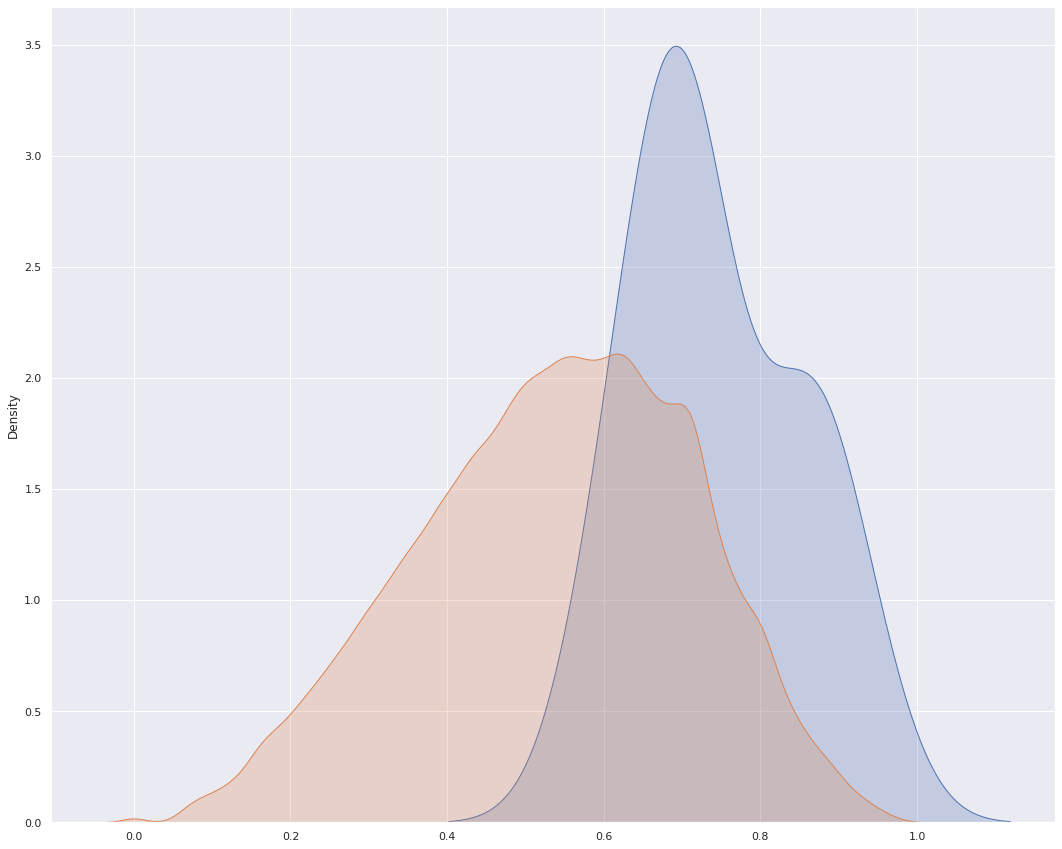

In [ ]:
dataFrame = df_popularity
dataFrame.sort_values(by=["popularity"], inplace = True, ascending = False)
test_group_df = dataFrame.head(15)
other_group_df = dataFrame.tail(174374)

ax = sns.kdeplot(test_group_df["danceability"].rename(""), shade = True)
sns.kdeplot(other_group_df["danceability"].rename(""), ax = ax, shade = True)
plt.show()



*   Blue area represents the most popular songs danceability values (in this case we took 15 of them). On the other hand, orange area represents the other danceability values which are not in the most popular songs' list.
* So, we see that popular songs have higher danceability features than the non-popular ones but we have to calculate the p_value to find out the correct answer.
*   After this step, we will calculate the p_value to find out if our null hypothesis holds (We used significance level as 0.05).

---



In [ ]:
significance=0.05
test_group_values = test_group_df["danceability"]
other_group_values = other_group_df["danceability"]

_, p_value = stats.ttest_ind(a=test_group_values, b=other_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Significance Level:", significance)
if (p_value < significance):
  print("Based on current value of p value we reject null hypothesis, dancebility affects popularity.")
else:
  print("Based on current value of p value we fail to reject null hypothesis, dancebility does not affect popularity.")

P value:  2.27E-06
Significance Level: 0.05
Based on current value of p value we reject null hypothesis, dancebility affects popularity.


* We see that our null hypthotesis is wrong. Thus, danceability affects popularity.


---



#### Hypothesis -> 2
<font color='sky blue'>*Null Hypothesis: *

Liveness has no effect on the popularity of the song.

<font color='sky blue'>*Alternative Hypothesis: *

Liveness has an effect on the popularity of the song.

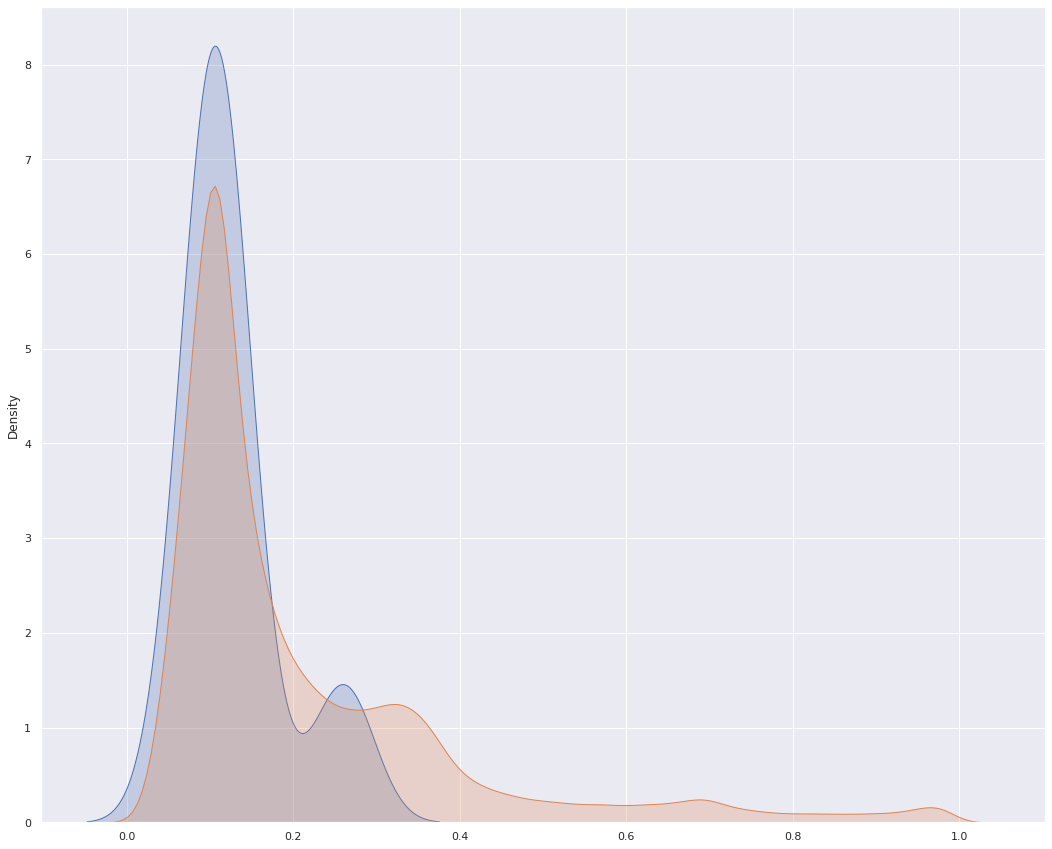

In [ ]:
ax = sns.kdeplot(test_group_df["liveness"].rename(""), shade = True)
sns.kdeplot(other_group_df["liveness"].rename(""), ax = ax, shade = True)
plt.show()

* Blue area represents the most popular songs liveness values (in this case we took 15 of them). On the other hand, orange area represents the other liveness values which are not the most popular songs.
* So, we see that popular songs have higher liveness features than the non-popular ones but we have to calculate the p_value to find out the correct answer.
* After this step, we will calculate the p_value to find out if our null hypothesis holds (We used significance level as 0.05).

In [ ]:
significance=0.05
test_group_values = test_group_df["liveness"]
other_group_values = other_group_df["liveness"]

_, p_value = stats.ttest_ind(a=test_group_values, b=other_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Significance Level:", significance)
if (p_value < significance):
  print("Based on current value of p value we reject null hypothesis, liveness affects popularity.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, liveness does not affect popularity.")

P value:  7.20E-05
Significance Level: 0.05
Based on current value of p value we reject null hypothesis, liveness affects popularity.


* We see that our null hypthotesis is wrong. Thus, liveness affects popularity.


---




### Statistical tests to check if significant differences exist between different eras (like comparing features of 80s and 90s hip-hop)

In [ ]:
df_metal_90plus = new_version[new_version["genres"].str.contains("metal")]
df_metal_90plus = df_metal_90plus[df_metal_90plus["year"] >= 1990]
df_metal_90s = df_metal_90plus[df_metal_90plus["year"] <= 1999 ]

df_metal_90s_tempo = df_metal_90s["tempo_y"] 
df_metal_90s.mean() 

year                    1994.664948
acousticness_y             0.051685
danceability_y             0.434723
duration_ms_y         275669.225625
energy_y                   0.822868
instrumentalness_y         0.201211
liveness_y                 0.228327
loudness_y                -7.301584
speechiness_y              0.085867
tempo_y                  124.054116
valence_y                  0.387395
popularity_y              43.179930
dtype: float64

These values are the general statistics (means) of the Metal genre between 1990-1999 (90s).


---



In [ ]:
df_metal_00s = new_version[new_version["genres"].str.contains("metal")]
df_metal_00s = df_metal_00s[df_metal_00s["year"] >= 2000]
df_metal_00s = df_metal_00s[df_metal_00s["year"] <= 2009]
      
df_metal_00s_tempo =  df_metal_00s["tempo_y"] 
df_metal_00s.mean()

year                    2004.223206
acousticness_y             0.046622
danceability_y             0.447326
duration_ms_y         251351.576230
energy_y                   0.857152
instrumentalness_y         0.114354
liveness_y                 0.245799
loudness_y                -5.345240
speechiness_y              0.086783
tempo_y                  126.633382
valence_y                  0.382995
popularity_y              46.636859
dtype: float64

These values are the general statistics (means) of the Metal genre between 2000-2009(00s).


---



#### Hypothesis -> 1
<font color='sky blue'>*Null Hypothesis: *

90s Metal Tempo is not higher than (lower than) the 00s tempo.

<font color='sky blue'>*Alternative Hypothesis: *

90s Metal Tempo is higher than the 00s tempo.


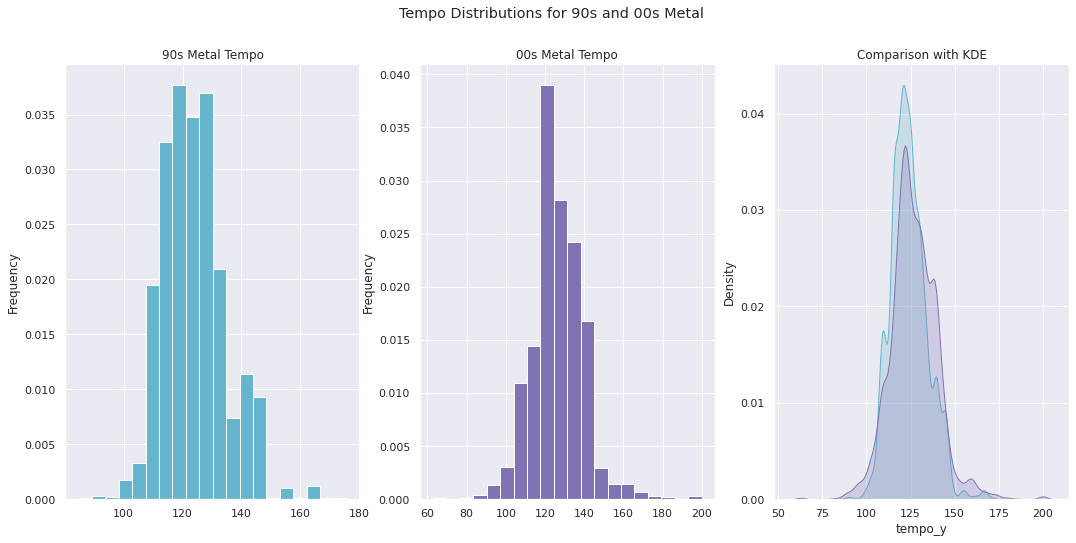

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,8)) 
        
df_metal_90s_tempo.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("90s Metal Tempo")

df_metal_00s_tempo.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("00s Metal Tempo")

sns.kdeplot(df_metal_90s_tempo, shade=True, label="low tempo level songs", ax=ax[2], color="c")
sns.kdeplot(df_metal_00s_tempo, shade=True, label="high tempo level songs", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Tempo Distributions for 90s and 00s Metal")
plt.show()



*   We compared the Metal genre according to the eras of 90s and 00s. Blue area represents the 90s Metal music tempo feature and purple area represents 00s Metal music tempo feature.
*   We see that mostly the two era's tempo are similar (90s tempo is a bit higher) but to be sure, we have to check its p_value.



In [ ]:
significance=0.05
test_group_values = df_metal_90s_tempo
other_group_values = df_metal_00s_tempo

_, p_value = stats.ttest_ind(a=test_group_values, b=other_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Significance Level:", significance)
if (p_value < significance):
  print("Based on current value of p value we reject null hypothesis, 90s Metal music tempo higher than 00s.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, 90s Metal music tempo lower than 00s.")

P value:  6.73E-25
Significance Level: 0.05
Based on current value of p value we reject null hypothesis, 90s Metal music tempo higher than 00s.


* We see that our null hypthotesis is wrong. Thus, 90s Metal music tempo higher than 00s Metal music.

---



#### Hypothesis -> 2
<font color='sky blue'>*Null Hypothesis: *

90s Metal  Instrumentalness is not higher than (lower than) the 00s  Instrumentalness.

<font color='sky blue'>*Alternative Hypothesis: *

90s Metal  Instrumentalness is higher than the 00s  Instrumentalness.


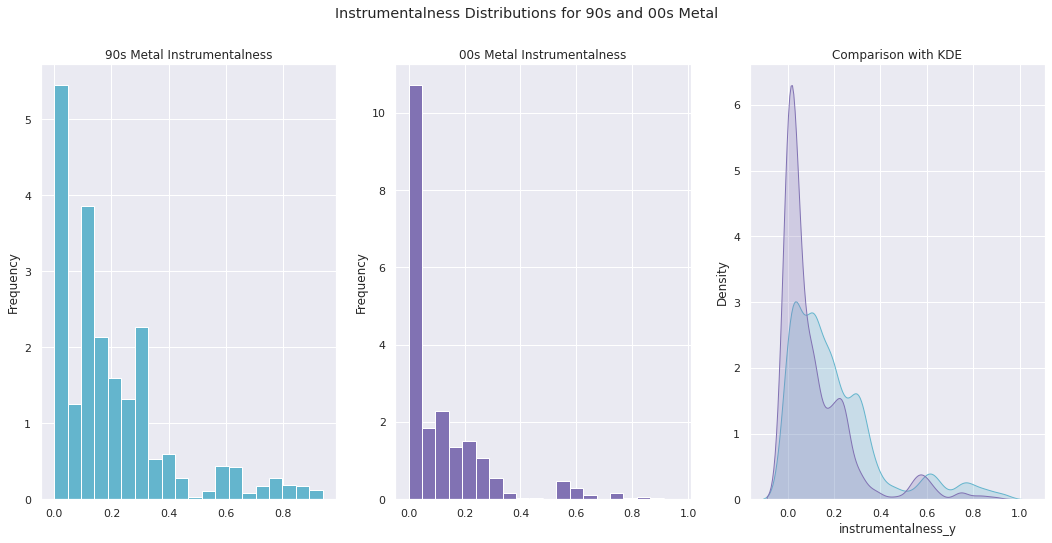

In [ ]:
df_metal_90s_instrumentalness =  df_metal_90s["instrumentalness_y"] 
df_metal_00s_instrumentalness =  df_metal_00s["instrumentalness_y"] 

fig, ax = plt.subplots(1, 3, figsize=(18,8))  

df_metal_90s_instrumentalness.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("90s Metal Instrumentalness")

df_metal_00s_instrumentalness.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("00s Metal Instrumentalness")

sns.kdeplot(df_metal_90s_instrumentalness, shade=True, label="low energy level songs", ax=ax[2], color="c")
sns.kdeplot(df_metal_00s_instrumentalness, shade=True, label="high energy level songs", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Instrumentalness Distributions for 90s and 00s Metal")
plt.show()



*   We compared the Metal genre according to the eras of 90s and 00s. Blue area represents the 90s Metal music instrumentalness feature and purple area represents 00s Metal music instrumentalness feature.
*   We see that mostly the two era's instrumentalness are different (00s instrumentalness is a bit higher in some instrumentalness values) but to be sure, we have to check its p_value.



In [ ]:
significance=0.05 
test_group_values = df_metal_90s_instrumentalness
other_group_values = df_metal_00s_instrumentalness

_, p_value = stats.ttest_ind(a=test_group_values, b=other_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Significance Level:", significance)
if (p_value < significance):
  print("Based on current value of p value we reject null hypothesis, 90s Metal music instrumentalness higher than 00s.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, 90s Metal music instrumentalness lower than 00.")

P value:  1.47E-123
Significance Level: 0.05
Based on current value of p value we reject null hypothesis, 90s Metal music instrumentalness higher than 00s.


* We see that our null hypthotesis is wrong. Thus, 90s Metal music instrumentalness higher than 00s Metal music instrumentalness.

---



### Statistical tests on sub-genres (investigating if there are significant statistical differences in features of different sub-genres of the same parent genre, eg. comparing features of british rock and anadolu rock songs)




---


Now, we are going to compare 2 of the subgenres of pop and observe their feature relations.


*   Indie Pop
*   Dance Pop



---



#### Hypothesis -> 1
<font color='sky blue'> *Null Hypothesis: * 

Dance pop and Indie pop's speechiness are not related or similar.

<font color='sky blue'> *Alternative Hypothesis: *

Dance pop and Indie pop's speechiness are related or similar.


Text(0.5, 1.0, 'Dance Pop Speechiness')

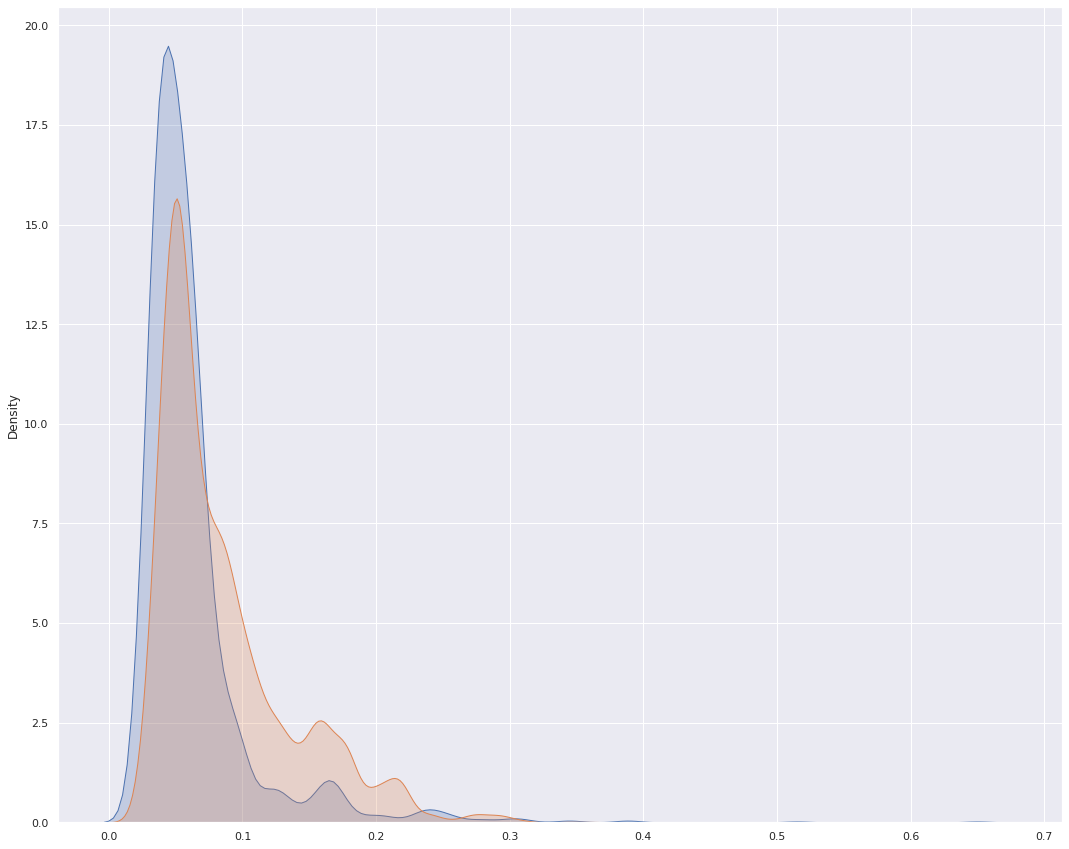

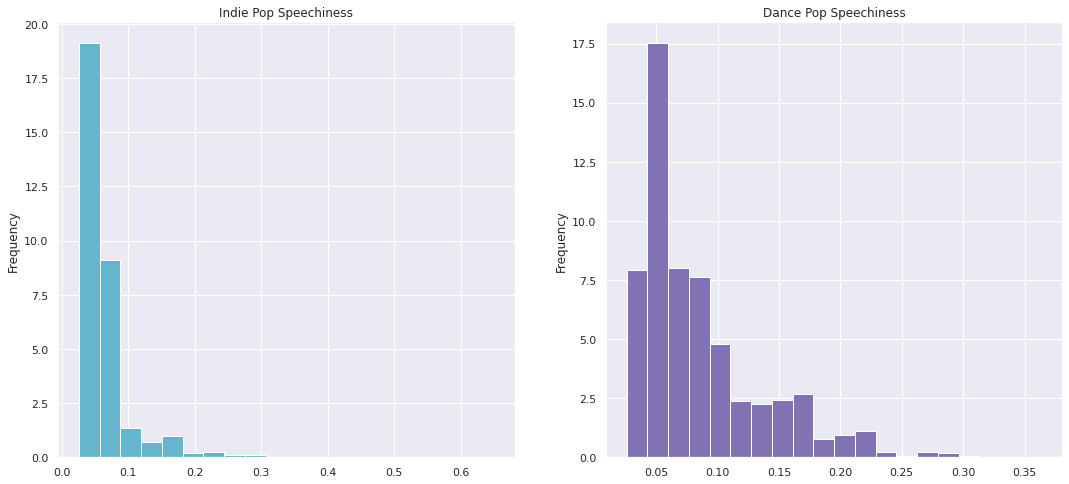

In [ ]:
indie_pop_df = new_version[new_version["genres"].str.contains("indie pop")]
dance_pop_df = new_version[new_version["genres"].str.contains("dance pop")]

ax = sns.kdeplot(indie_pop_df["speechiness_y"].rename(""), shade = True)
sns.kdeplot(dance_pop_df["speechiness_y"].rename(""), ax = ax, shade = True)

fig, ax = plt.subplots(1, 2, figsize=(18,8))
indie_pop_df = indie_pop_df["speechiness_y"]
indie_pop_df.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("Indie Pop Speechiness")
dance_pop_df = dance_pop_df["speechiness_y"]
dance_pop_df.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("Dance Pop Speechiness")

* In the first graph, blue area represents the Indie Pop songs speechiness values. On the other hand, orange area represents the Dance pop speechiness values.
* So, we can see from these 2 tables, mostly speechiness feature of 2 subgenres are similar as we conlude in the following step.
* After this step, we will calculate the p_value to find out if our null hypothesis holds (We used significance level as 0.05).

In [ ]:
significance=0.05
indie_pop_df_values = indie_pop_df
dance_pop_df_values = dance_pop_df

_, p_value = stats.ttest_ind(a=indie_pop_df_values, b=dance_pop_df_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Significance Level:", significance)
if (p_value < significance):
  print("Based on current value of p value we reject null hypothesis, Indie pop and Dance pop's speechiness values are related or similar.")
else:
   print("Based on current value of p value we fail to reject null hypothesis,  Indie pop and Dance pop's speechiness values are not related or similar.")


P value:  3.80E-79
Significance Level: 0.05
Based on current value of p value we reject null hypothesis, Indie pop and Dance pop's speechiness values are related or similar.


* We see that our null hypthotesis is wrong. Thus, Indie pop and Dance pop's speechiness feature are related or similar.
---



#### Hypothesis -> 2
<font color='sky blue'> *Null Hypothesis: * 

Indie pop and Dance pop's tempo are not related or similar.

<font color='sky blue'> *Alternative Hypothesis: *

indie pop and Dance pop's tempo are related or similar.


Text(0.5, 1.0, 'Dance Pop Tempo')

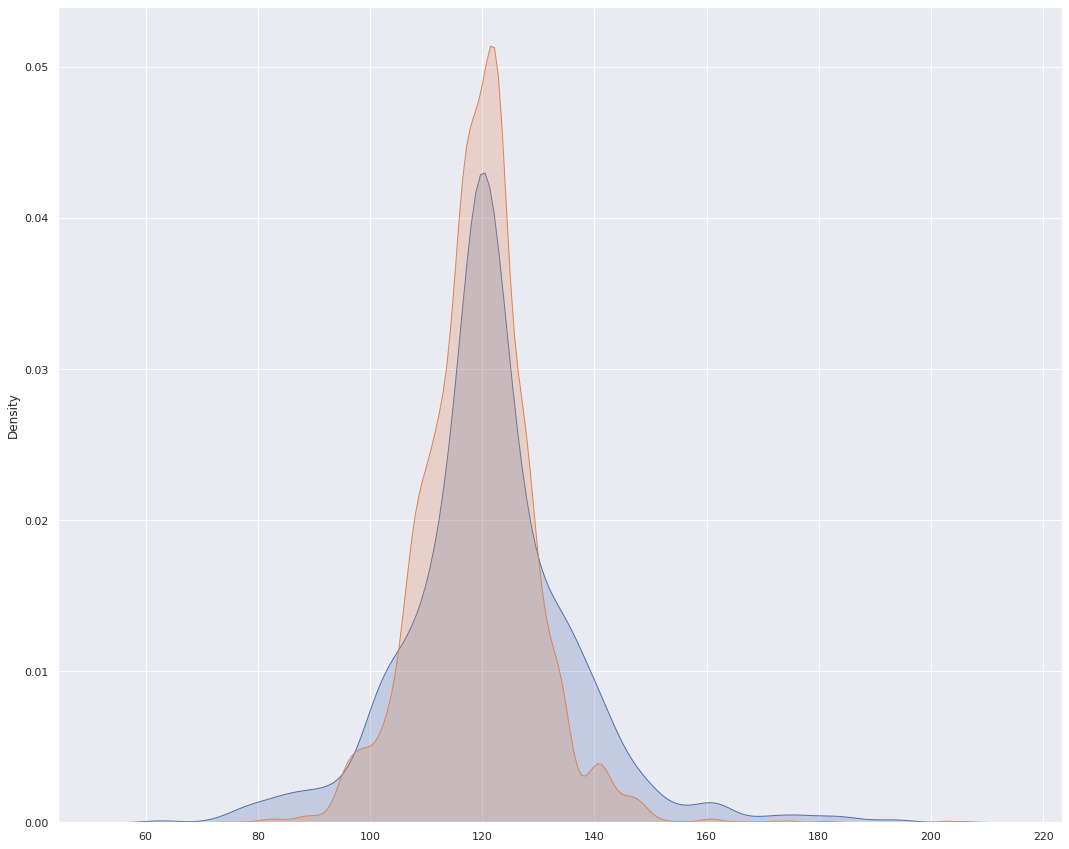

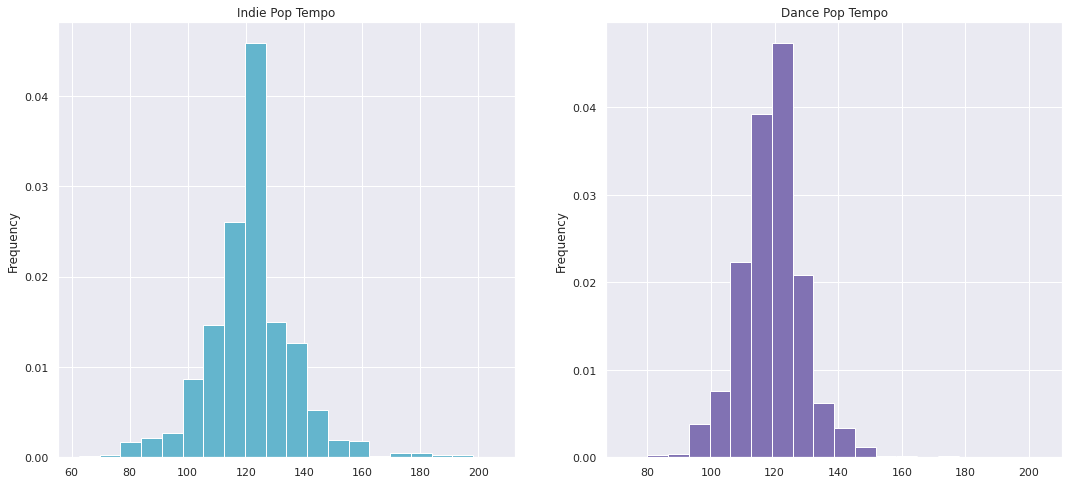

In [ ]:
indie_pop_df = new_version[new_version["genres"].str.contains("indie pop")]
dance_pop_df = new_version[new_version["genres"].str.contains("dance pop")]

ax = sns.kdeplot(indie_pop_df["tempo_y"].rename(""), shade = True)
sns.kdeplot(dance_pop_df["tempo_y"].rename(""), ax = ax, shade = True)

fig, ax = plt.subplots(1, 2, figsize=(18,8))
indie_pop_df = indie_pop_df["tempo_y"]
indie_pop_df.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("Indie Pop Tempo")

dance_pop_df = dance_pop_df["tempo_y"]
dance_pop_df.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("Dance Pop Tempo")

* In the first graph, blue area represents the Indie Pop songs tempo values. On the other hand, orange area represents the Dance pop tempo values.
* So, we can see from these 2 tables, mostly tempo feature of 2 subgenres are similar as we conlude in the following step.
* After this step, we will calculate the p_value to find out if our null hypothesis holds (We used significance level as 0.05).

In [ ]:
significance=0.05
dance_pop_df_values = dance_pop_df
indie_pop_df_values = indie_pop_df

_, p_value = stats.ttest_ind(a=dance_pop_df_values, b=indie_pop_df_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Significance Level:", significance)
if (p_value < significance):
  print("Based on current value of p value we reject null hypothesis, Dance pop and Indie pop's tempo are related or similar.")
else:
   print("Based on current value of p value we fail to reject null hypothesis,  Dance pop and Indie pop's tempo are not related or similar.")

P value:  4.24E-08
Significance Level: 0.05
Based on current value of p value we reject null hypothesis, Dance pop and Indie pop's tempo are related or similar.


* We see that our null hypthotesis is wrong. Thus,  Dance pop and Indie pop's tempo are related or similar.
---



We compared Dance pop and Indie pop in terms of their tempo and speechiness features. As a conclusion, we see that this two sub-genre are similar.


---




## **Machine Learning**




---


### Prediction of song popularity with various machine learning models

In this section we will train different ML models over the spotify dataset in order to create a system that can predict popularity of songs given various audio features recorded in the dataset. Since our problem is primarily a classification problem, and we have a significant amount of labeled historical data, we have chosen Random Forest Classifier, K-Nearest Neighbours Classifier, and Decision Tree Classifier for our investigation.



---



#### Data Preperation

However, before we can initialise our models and begin training them on our data, we first have to refactor the data in order to make sure that it is in a form suitable for input to our chosen algorithms. 

This data preperation phase usually consists of a multi-stage process. However, we can skip some of these stages as we have already explored the data in our previous "Exploratory Data Analysis" section, and understand that the data is satisfactorily structured, balanced and free from problematic outliers. 

We will be following the following steps during our data preperation phase: 

1) Data profiling: While we did some exploratory profiling during our initial data exploration. We missed out some aspects that are essential for ensuring the usability of our data for our selected algorithms.

2) Imputation: Incase of missing values, we will drop the rows with missing values.

3) Scaling: The data needs to be correctly scaled in order to be useable.

4) Feature Engineering: We have two categorical features that we will encode with one-hot encoding. Further, we need to convert popularity to a binary variable, we can use it with our selected prediction algorithms.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm 
from os.path import join

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

This is our environment that will be used in the ML section. From now on, we eill perform some basic data profiling. 

Next cell represents the statistics of the data that we will use.

In [ ]:
df_ML = pd.read_csv(join(path_prefix, "data.csv")) 
df_ML.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


While minimum values of "0" for audio characteristics are viable and possibly useful for our ML models, we can also see that there are songs with minimum popularity values of "0". This might be due to the songs having been sung by unknown artists, or may have been badly marketed, or may have faced any of several similar external issues that had little or no relation to their audio characteristics etc. So, we should consider the proportion of the values of “0”.


 If we are constructing a model to predict a song's popularity based on its audio features, there is an implicit assumption that external factors are not playing a significant part in its popularity. 


There are two possible scenarios: 

1-If the number of "0" values for popularity are small, they will not significantly affect the accuracy of our models. 

2-If these values account for a significant portion of our dataset, they could skew the performance of the model and we should solve that problem.


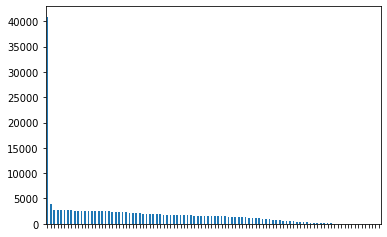

In [ ]:
x = df_ML['popularity'].value_counts(sort=True)
hist = x.plot(kind='bar')
hist.set_xticklabels([])
plt.show()

As can be seen from the above histogram, there is an extreme outlier for "0" popularity. There are over thousands of songs with "0" popularity. This accounts for a significant portion of our entire data set and would skew our prediction model. We will therefore drop all rows with a popularity value of "0". Below there are statistics of data with non-zero popularity.

In [ ]:
df_ML = df_ML[df_ML.popularity != 0]
df_ML.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,133484.000000,133484.000000,1.334840e+05,133484.000000,133484.000000,133484.000000,133484.000000,133484.000000,133484.000000,133484.000000,133484.000000,133484.000000,133484.000000,133484.000000,133484.000000
mean,0.445756,0.537559,2.328956e+05,0.517069,0.064457,0.152212,5.198271,0.208644,-11.092275,0.711703,33.566892,0.079103,118.397793,0.533009,1982.010181
std,0.360302,0.173297,1.273368e+05,0.266594,0.245566,0.301002,3.510869,0.183613,5.358354,0.452972,18.992977,0.118517,30.009354,0.263969,22.011721
min,0.000000,0.000000,1.470800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.070700,0.421000,1.696658e+05,0.299000,0.000000,0.000000,2.000000,0.096400,-13.922000,0.000000,20.000000,0.033900,95.357750,0.319000,1965.000000
50%,0.412000,0.547000,2.124000e+05,0.519000,0.000000,0.000179,5.000000,0.134000,-10.266500,1.000000,33.000000,0.042900,116.463500,0.543000,1982.000000
75%,0.805000,0.663000,2.679730e+05,0.737000,0.000000,0.061800,8.000000,0.265000,-7.144000,1.000000,47.000000,0.066800,136.567000,0.754000,1998.000000
max,0.996000,0.988000,4.892761e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


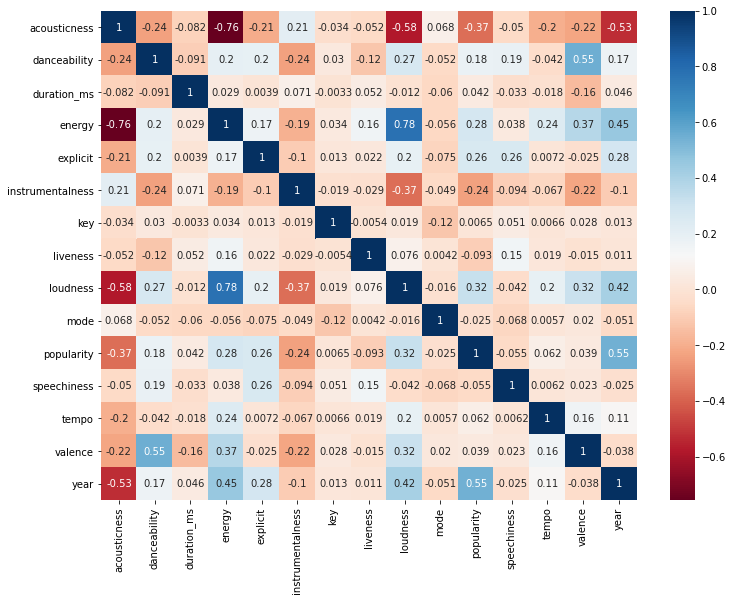

In [ ]:
plt.figure(figsize=(12, 9))
corr = df_ML.corr() # or df 
heat=sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap=cm.RdBu,annot=True)

plt.show()

There are weak-medium positive correlations between popularity and the audio features loudness, explicit, energy and danceability. There are also significant negative correlations between popularity and the features instrumentalness and acousticness.

Now that we have established that there aren't any problematic extreme outliers in the density distributions for our feature variables. Let us scale our data to enhance performance on ML algorithms. Checking for extreme outliers was important as extreme outliers can stretch the scaling range abnormally, thereby skewing the scaled data.

---




In [ ]:
df_ML.loc[df_ML["mode"] == 'Major', "mode"] = 1
df_ML.loc[df_ML["mode"] == 'Minor', "mode"] = 0

keys = df_ML['key'].unique()
for i in range(len(keys)):
    df_ML.loc[df_ML['key'] == keys[i], 'key'] = i
df_ML

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,8,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,8,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,8,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174361,0.105000,['Ashnikko'],0.781,172720,0.487,1,660rulYF3eLCuW6rQpiMdL,0.000000,8,0.0802,-7.301,0,Little Boy,61,2021-01-15,0.1670,129.941,0.3270,2021
174370,0.124000,"['Chinese Relaxation and Meditation', 'Asian T...",0.713,139511,0.378,0,2RIgshOl2cbZ7i6zu2j4ee,0.726000,11,0.3450,-12.905,1,Fortune and Joy,2,2021-01-16,0.0311,140.029,0.6410,2021
174374,0.013500,['Denis Pimenov'],0.770,211069,0.683,0,3kJINDNpUxwXuS2vVdCpOu,0.866000,8,0.1020,-6.007,0,Periscope,1,2020-12-05,0.0488,120.020,0.0971,2020
174378,0.809000,"['Chinese Relaxation and Meditation', 'Asian T...",0.574,133092,0.182,0,6bIrLTeTJHrSa9EpBPSFKM,0.941000,11,0.1560,-16.197,1,Song of Cheerfulness,2,2021-01-16,0.0820,80.483,0.3300,2021


For popularity. Let us take the top 10 percent of songs to be popular, and the rest to be not-popular.

In [ ]:
np.percentile(df_ML['popularity'], 90)

59.0

The 90th percentile for popularity gives us a value of 59.0. Which means that we will encode any value below this as 0(not popular) and any value above as 1(popular).

In [ ]:
df_ML.loc[df_ML['popularity'] < 59, 'popularity'] = 0 
df_ML.loc[df_ML['popularity'] >= 59, 'popularity'] = 1
df_ML

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,8,0.3790,-12.628,0,Keep A Song In Your Soul,0,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,8,0.0809,-7.261,0,I Put A Spell On You,0,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,8,0.5190,-12.098,1,Golfing Papa,0,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,0,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,0,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174361,0.105000,['Ashnikko'],0.781,172720,0.487,1,660rulYF3eLCuW6rQpiMdL,0.000000,8,0.0802,-7.301,0,Little Boy,1,2021-01-15,0.1670,129.941,0.3270,2021
174370,0.124000,"['Chinese Relaxation and Meditation', 'Asian T...",0.713,139511,0.378,0,2RIgshOl2cbZ7i6zu2j4ee,0.726000,11,0.3450,-12.905,1,Fortune and Joy,0,2021-01-16,0.0311,140.029,0.6410,2021
174374,0.013500,['Denis Pimenov'],0.770,211069,0.683,0,3kJINDNpUxwXuS2vVdCpOu,0.866000,8,0.1020,-6.007,0,Periscope,0,2020-12-05,0.0488,120.020,0.0971,2020
174378,0.809000,"['Chinese Relaxation and Meditation', 'Asian T...",0.574,133092,0.182,0,6bIrLTeTJHrSa9EpBPSFKM,0.941000,11,0.1560,-16.197,1,Song of Cheerfulness,0,2021-01-16,0.0820,80.483,0.3300,2021




---


####Training and Testing

We are now ready to begin initialising and training our ML models. Below, there are some libraries that we used for this step.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [ ]:
features_by_data = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "valence"]

training = df_ML.sample(frac = 0.8,random_state = 420)
X_train = training[features_by_data]
y_train = training['popularity']
X_test = df_ML.drop(training.index)[features_by_data]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [ ]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy of the model with random forest : " + str(RFC_Accuracy))


Accuracy of the model with random forest : 0.8960576833036801


In [ ]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy of the model with k : " + str(KNN_Accuracy))


Accuracy of the model with k : 0.8772356962262384


In [ ]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy of the model with decision tree :" + str(DT_Accuracy))


Accuracy of the model with decision tree :0.8336454724225115


As we see from the accuracy of three test score, they are close to each other and our methods are accurate. However, the most accurate model is Random Forest.



---



### Efforts on hyper-parameter tuning to increase the performance of models


Whenever we use ML models like the ones we have used above, we can specify options that determine the model architecture. However, it is often very difficult to determine what model structure would be suitable for our given data. 

This is why we used the ML models in the last section with their default parameters. However, in this section we will attempt to improve the performance of our models by experimenting with different hyperparameter values. 

Some models are more sensitive to initial hyper-parameters, while others are more parameter agnostic. For exmaple, from our list of models, KNN is the most parameter agnostic as it makes little to no assumptions about the structure of the input data. It also had excellent accuracy on our test data, therefore we see little use in trying to tune it further

RandomForrest is perhaps the most sensitive to parameter tuning and therefore we will focus our efforts on tuning it for better performance


---



Lets understand what parameters are used by default:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

print('Parameters currently in use:\n')
print(rf.get_params())


Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


We will use cross validation while validating our model over a range of hyper-parameter values. We use cross validation to ensure that we have enough data to train each of the models while avoiding over/under fitting and data leakage. 

We will use randomisedsearchCV to sample a range of hyper-parameter values, and then iteratively train/test over that sample.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 12, num = 3)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 20, num = 2)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [4, 8, 12], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Now that we have our grid of possible hyper-parameter values. Lets begin the cross validation process.

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   20.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

Lets see the best params determined:

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 4}

Now lets evaluate the accuracy of our base model against the accuracy of our model using the parameters we determined to be the best after hyper-parameter tuning.

In [ ]:
RFC_predict = RFC_Model.predict(X_valid)
RFC_accuracy = accuracy_score(y_valid, RFC_predict.round())
print("Accuracy of base model: " + str(RFC_accuracy))

best_random = g_search.best_estimator_

RFC_predict_best = best_random.predict(X_train)
RFC_accuracy_best = accuracy_score(y_train, RFC_predict_best.round())
print("Accuracy of tuned model: " + str(RFC_accuracy_best))

Accuracy of base model: 0.8960576833036801
Accuracy of tuned model: 0.9954230998841143


As we can see. Hyper-parameter tuning was very effective and has resulted in significantly improved accuracy (nearly %100) for our model


---



### Creating a simple song recommendation system (The system can work as accepting a list of songs as input and returns a selected number of songs similar to the ones given in the input) using similarity metrics and Nearest Neighbors methods



---


In this section we will implement a recommendation system using similarity metrics and NN methods. We used the ID as the input because we want to take unique inputs. Therefore, input and output will be based on ID of the song. For instance, 4d6HGyGT8e121BsdKmw9v6 represents "When irish eyes are smiling".


---



We used the data.csv for this system.

In [ ]:
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
from sklearn_pandas import DataFrameMapper

df = pd.read_csv(join(path_prefix, "data.csv"))


We need to convert mode and key to numeriacl values (again) like we did in the previos part. 

In [ ]:
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0

list_of_keys = df['key'].unique()
for i in range(len(list_of_keys)):
    df.loc[df['key'] == list_of_keys[i], 'key'] = i

Now we will scale each attribute. Otherwise differing ranges in different attributes will result in an overly large ranged attribute skewing our distance function.

In [ ]:
attributes = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "mode", "key"]
df_attr = df[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "mode", "key"]]
ss = StandardScaler()
df_attr_scaled = pd.DataFrame(ss.fit_transform(df_attr),columns = df_attr.columns)
df_attr_scaled.head()



,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key
0,1.294358,0.347919,-0.948791,-0.588004,0.930106,-0.154111,-0.066549,1.089753,0.413903,-1.536239,0.314592
1,0.378411,1.790898,0.125710,-0.510657,-0.721489,0.788862,-0.287113,-0.995485,1.608718,-1.536239,0.314592
2,1.299622,0.626289,-1.088146,-0.589511,1.705763,-0.060991,0.374580,-0.641450,0.621861,0.650940,0.314592
3,-1.313529,1.097814,1.156204,1.804534,-0.460536,0.780077,-0.346918,0.363273,-1.823729,0.650940,-2.371152
4,-0.537536,0.950107,0.822485,-0.588829,1.057535,1.004092,-0.158725,0.167564,-0.852753,-1.536239,1.081947


In [ ]:
df_id = df[['id']]
df_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      174389 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [ ]:
df_main = pd.concat([df_id.reset_index(drop=True), df_attr_scaled.reset_index(drop=True)], axis=1)
df_main.head()

,id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key
0,0cS0A1fUEUd1EW3FcF8AEI,1.294358,0.347919,-0.948791,-0.588004,0.930106,-0.154111,-0.066549,1.089753,0.413903,-1.536239,0.314592
1,0hbkKFIJm7Z05H8Zl9w30f,0.378411,1.790898,0.125710,-0.510657,-0.721489,0.788862,-0.287113,-0.995485,1.608718,-1.536239,0.314592
2,11m7laMUgmOKqI3oYzuhne,1.299622,0.626289,-1.088146,-0.589511,1.705763,-0.060991,0.374580,-0.641450,0.621861,0.650940,0.314592
3,19Lc5SfJJ5O1oaxY0fpwfh,-1.313529,1.097814,1.156204,1.804534,-0.460536,0.780077,-0.346918,0.363273,-1.823729,0.650940,-2.371152
4,2hJjbsLCytGsnAHfdsLejp,-0.537536,0.950107,0.822485,-0.588829,1.057535,1.004092,-0.158725,0.167564,-0.852753,-1.536239,1.081947


Since we used a colab notebook and user cannot reach our database, we used hand written ID inputs (2 songs, or if you wish more, are added by us)

In [ ]:
song_id = ["4d6HGyGT8e121BsdKmw9v6", "3ftBPsC5vPBKxYSee08FDH"]  #When Irish Eyes Are Smiling, Danny Boy 
search_rows = []

for i in song_id:
  song_row = df_main[["id"]+attributes][df_main["id"].str.contains(i)]
  search_rows.append(song_row[attributes].to_numpy())
  print(search_rows)

[array([[ 1.20486877, -0.67466414, -1.06247562, -0.58955898,  0.09904503,
         0.29075698, -0.3716082 , -0.50708843, -1.02668163,  0.6509402 ,
         1.08194696]])]
[array([[ 1.20486877, -0.67466414, -1.06247562, -0.58955898,  0.09904503,
         0.29075698, -0.3716082 , -0.50708843, -1.02668163,  0.6509402 ,
         1.08194696]]), array([[ 1.23118908, -1.4870499 , -0.63707588, -0.58948121,  0.9411867 ,
         0.42780166, -0.38587356, -0.5585195 , -1.35941498,  0.6509402 ,
         0.31459156]])]




---


Now that we have our properly formated search rows with only attribute values included, we can conduct our search. First ID belongs to the song "When Irish Eyes Are Smiling" and the second ID belongs to the song "Danny Boy".


---



In [ ]:
for i in search_rows:

  similar = OrderedDict()
  for index, row in df_main.iterrows():
      comparison_vec = row[attributes].to_numpy()
      dist = ((i - comparison_vec)**2).mean()
      similar[dist] = row[["id"]]

  for k, v in sorted(similar.items(), key=lambda x:x[0]):
      if k > 0.05: break
      print(v['id'])
  print()


4d6HGyGT8e121BsdKmw9v6
7qiIkx78SyneuLCO6tjV1G
6ZWYZmHr0Wdhxtw22jUggK
5zUlGUJlIxndUvMFvUW1lJ
25mXhNzmG2T8PqegbunKEP
46M389VUrlVYXFgBBoaoft
6DVOThiin61bmeIwf6fzGx
4oXp5t8GCVXyJsAm4iuHqF
1bstuQ0ZqUeYc6NGcGWzJs
7tue2Wemjd0FZzRtDrQFZd
55bIJUzeOJkDtQuCWGm5tN
3y36snFYemSnH4y2O2zfzH
0qtCmH6geLWgsWHX2lyiMD

3ftBPsC5vPBKxYSee08FDH
4a8qNJVZ1FBeypUiJpkjlo
1FyBTYbuK4B4xxFcAr43Kg
6BuHug19tvd3QgB4BKJqtW
1vr0vwGrqjSMvN1xzIwWjF
51YXnqtUHDjl5WrXaOmpQ3
0BXSfHqkjgCzd98vqYRKhD
7m9e8QzCbb3syOHNNz23gD
1h5qxFrlCMsH9JXj6hiYRi
5y9Iy1H5reIJpvnFRJIOwh
2K7kWu5ae4W1RVs1mv5XDg
2RPfvw31zm7qmFiF1j4mJY
6csU5EvfcRi2NNoOwNVg8A
2fwms7R3b5N8aBnJ1CaltH
0GEmawtTLtHjzNuyIEe7Ur
6WISirSAs79wNXlex2bR1r



Our system recommended 29 songs (first 13 songs belongs to the first input, which is When Irish Eyes Are Smiling, rest belogns to the second input, Danny Boy). Since we searched with ID's, our system reccomended songs with their ID numbers. User can see the name and the other features of the reccomended songs by searching in the dataframe.


---



### Song clustering based on available features and trying to relate them with existing genres 

In this section we will use K-mean clustering, an unsupervised clustering algorithm, to identify clusters of songs similar features. Then we will analyse the clusters identified in order to attempt to establish linkages with existing genre clusters. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv(join(path_prefix, "data.csv"))

features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "valence"]

df_features = df[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "mode", "key"]]
ss = StandardScaler()
df_features_scaled = pd.DataFrame(ss.fit_transform(df_features),columns = df_features.columns)
df_features_scaled.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key
0,1.294358,0.347919,-0.948791,-0.588004,0.930106,-0.154111,-0.066549,1.089753,0.413903,-1.536239,-0.058354
1,0.378411,1.790898,0.125710,-0.510657,-0.721489,0.788862,-0.287113,-0.995485,1.608718,-1.536239,-0.058354
2,1.299622,0.626289,-1.088146,-0.589511,1.705763,-0.060991,0.374580,-0.641450,0.621861,0.650940,-1.479502
3,-1.313529,1.097814,1.156204,1.804534,-0.460536,0.780077,-0.346918,0.363273,-1.823729,0.650940,-0.911043
4,-0.537536,0.950107,0.822485,-0.588829,1.057535,1.004092,-0.158725,0.167564,-0.852753,-1.536239,1.362794


Now we will apply principal component analysis to the data, before applying the k-means clustering algorithm. This improves the performance of the clustering algorithm by reducing noise, and also allows better visualisation of such higher dimensional data as we have.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pc_1 = pca.fit_transform(df_features_scaled)
print(pc_1)

[[ 0.43760862  0.66664479  0.78188992 ...  0.48166126 -0.41852671
  -0.11341952]
 [-1.25049285  1.6937724   0.52526764 ... -0.05725815 -0.34805086
  -0.01745766]
 [ 0.77368608  1.35550989 -1.36874684 ...  0.35759734 -0.45250637
  -0.29706871]
 ...
 [ 0.35473132  0.07753498  0.89508707 ... -0.2415079  -0.50532287
   0.41663328]
 [ 0.91520404 -0.51640081 -1.76512446 ...  0.49826713 -0.70812154
   0.01614123]
 [-0.17855883 -0.01253252  0.03774362 ...  0.33248908  0.37763592
  -0.55777747]]


In [ ]:
PCA = pd.DataFrame(data = pc_1, columns = features)
PCA.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,valence
0,0.437609,0.666645,0.781890,0.301532,1.081873,-0.135743,0.470349,-2.118876,0.481661,-0.418527,-0.113420
1,-1.250493,1.693772,0.525268,-1.555811,-0.905664,0.833242,0.752744,-1.208244,-0.057258,-0.348051,-0.017458
2,0.773686,1.355510,-1.368747,1.560977,-0.373361,0.250364,1.230196,-1.093093,0.357597,-0.452506,-0.297069
3,-0.845531,-1.451932,-0.480881,-0.374889,0.266914,1.530449,-0.082884,2.145474,1.491777,-0.806232,0.287538
4,-1.477587,-0.319190,2.114600,0.437373,-0.539457,-0.184339,-0.125154,-0.495499,1.169904,-0.612716,0.246744


In [ ]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(pc_1)

We created 10 clusters with k means based on the available features.


---



In [ ]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = PCA.index.values
cluster_map['cluster'] = kmeans.labels_
cluster_map[cluster_map.cluster == 2]
print(cluster_map[cluster_map.cluster == 2])

        data_index  cluster
0                0        2
19              19        2
26              26        2
49              49        2
53              53        2
...            ...      ...
174186      174186        2
174302      174302        2
174315      174315        2
174337      174337        2
174355      174355        2

[14174 rows x 2 columns]


Cluster 2 contains 14174 songs. Using the above generated cluster_map we can identify which clusters our songs have been assigned to. After this we can identify which genres have been assigned to which clusters most often. Visualising this relationship enables us to understand exactly how our k-means identified clusters map to pre-existing genres. However, we did not create any visualization.


---



In [ ]:
cluster_map = pd.DataFrame()
cluster_map_total = pd.DataFrame()
cluster_map['data_index'] = PCA.index.values
cluster_map['cluster'] = kmeans.labels_

cluster_map_total['data_index'] = PCA.index.values
cluster_map_total['cluster'] = kmeans.labels_

for i in [1,2,3,4,5,6,7,8,9,10]:
  pd.concat([cluster_map[cluster_map.cluster == i], cluster_map_total])
  
print(cluster_map_total)

        data_index  cluster
0                0        2
1                1        5
2                2        1
3                3        0
4                4        5
...            ...      ...
174384      174384        5
174385      174385        3
174386      174386        9
174387      174387        3
174388      174388        9

[174389 rows x 2 columns]


We can now add original data from the main dataframe. 


---



In [ ]:
df_main = pd.concat([cluster_map_total.reset_index(drop=True), df_id.reset_index(drop=True)], axis=1)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   data_index  174389 non-null  int64 
 1   cluster     174389 non-null  int32 
 2   id          174389 non-null  object
dtypes: int32(1), int64(1), object(1)
memory usage: 3.3+ MB


After this we can use our model to predict cluster assignments for audio features taken from the data_by_genres data set. After this we can analyse each cluster to see if similar genres have been clustered in the same cluster. If that is the case we can determine that our identified clusters are strongly correlated with existing genres. 


---



In [ ]:
df = pd.read_csv(join(path_prefix, "data_by_genres.csv"))
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "valence"]

df_features = df[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "mode", "key"]]
ss = StandardScaler()
df_features_scaled = pd.DataFrame(ss.fit_transform(df_features),columns = df_features.columns)
df_features_scaled.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key
0,1.208953,-1.719082,-1.820105,0.808438,-0.342567,-2.340548,-0.282694,-1.636184,-1.698903,0.468639,-0.581166
1,0.367135,-1.532247,-0.823527,0.783343,0.598803,-1.539847,-0.163688,-0.046542,-1.234202,0.468639,1.513179
2,-1.061357,0.885221,1.573779,1.321452,-1.305403,0.497128,2.551018,4.218386,2.561720,0.468639,-0.281974
3,0.524427,0.041029,-0.420979,0.082977,0.163985,-0.244571,0.203483,-0.209947,0.012998,0.468639,0.316411
4,1.020234,-0.164990,-1.086073,-0.770822,0.183451,-0.449974,-0.016903,-0.819433,-0.148139,0.468639,0.316411


In [ ]:
kmeans_predictions = kmeans.predict(df_features_scaled)
print(kmeans_predictions)

[3 0 8 ... 2 9 1]


In [ ]:
df['cluster'] = kmeans_predictions
df.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,cluster
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1,3
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1,0
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1,8
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1,1


In order to see if similar genres/sonngs are grouped together in our clusters. Lets a pick a cluster at random and analyse the genre values. 


---



In [ ]:
df_cluster_3 = df.loc[df['cluster'] == 3]
df_cluster_3.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,cluster
0,21st century classical,0.754600,0.284100,352593.200000,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1,3
8,abstract idm,0.995000,0.174000,580533.000000,0.002910,0.931000,0.098300,-37.518000,0.039900,67.560000,0.032800,46.000000,0,1,3
9,accordeon,0.598750,0.442000,165480.000000,0.314000,0.607000,0.191675,-12.174250,0.042475,139.819500,0.511500,35.250000,2,1,3
16,acousmatic,0.932795,0.404181,241560.736227,0.182684,0.686388,0.210918,-21.225813,0.075756,98.769703,0.216282,5.658099,5,1,3
17,acoustic blues,0.740820,0.602674,201385.456850,0.365927,0.105188,0.168647,-12.528313,0.067375,114.692879,0.635845,22.238191,9,1,3


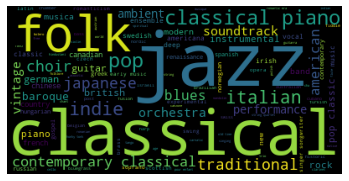

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud2 = WordCloud().generate(' '.join(df_cluster_3['genres']))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()


From approximately 29000 possible genre variations, we have been able to generate a wordcloud that clearly demonstrates that our picked cluster is dominated by 4-5 main genres labels. Three of the four most dominant labels are very similar genres in terms of audio features i.e. jazz,folk,classical. 

This shows that there is a clear and strong relationship between identified clusters and existing genres. 